In [38]:
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Генерація даних
x_values = np.arange(0, 100, 1)
y_values = x_values * np.cos(x_values)
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Побудова лінійної діаграми
chart = alt.Chart(data).mark_line().encode(
    x='x:Q',
    y='y:Q'
).properties(
    width=600,
    height=400,
    title='Графік функції y = x * cos(x)'
).configure_axis(
    titleFontSize=12,
    labelFontSize=10
).configure_title(
    fontSize=14
)
chart

alt.Chart(...)

In [8]:
# Завантаження даних про врожайність пшениці
wheat_data = data.wheat()

# Побудова горизонтальної діаграми з мітками
chart = alt.Chart(wheat_data).mark_bar().encode(
    x=alt.X('wheat:Q', title='Врожайність пшениці'),  # Вісь x для врожайності пшениці
    y=alt.Y('year:O', title='Роки'),  # Вісь y для років
    text='wheat:Q',  # Текстові мітки з врожайністю пшениці
).properties(
    width=600,
    title='Врожайність пшениці за роками'
)

# Додавання текстових міток до стовпчиків
text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Відстань між текстом та стовпчиком
).encode(
    text='wheat:Q'
)

# Об'єднання графіка та текстових міток
final_chart = chart + text
final_chart

alt.LayerChart(...)

In [9]:
# Завантаження даних про зміни в зайнятості в США
employment_data = data.us_employment()

# Побудова гістограми
histogram = alt.Chart(employment_data).mark_bar().encode(
    x=alt.X('month:N', title='Місяці'),
    y=alt.Y('nonfarm_change:Q', title='Зміни в зайнятості'),
    color=alt.condition(
        alt.datum.nonfarm_change >= 0,
        alt.value('steelblue'),  # Колір для додатних значень
        alt.value('orange')      # Колір для від'ємних значень
    )
).properties(
    width=500,
    title='Зміни в зайнятості в США за місяці'
)
histogram

alt.Chart(...)

In [11]:
# Завантаження даних про врожай ячменю
barley_data = data.barley()

# Побудова гістограми з групуванням
histogram = alt.Chart(barley_data).mark_bar().encode(
    x=alt.X('year:O', title='Роки'), # Вісь x для років
    y=alt.Y('sum(yield):Q', title='Сумарний врожай'), # Вісь y для сумарного врожаю
    color='year:N',               # Кольорова шкала для різних років
    column=alt.Column('site:N',   # Групування (стовпці) за різними місцями
                      title='Місця')
).properties(
    width=alt.Step(20),            # Ширина стовпців
    title='Сумарний врожай ячменю за роками та місцями'
)
histogram

alt.Chart(...)

In [16]:
# Завантаження даних про виробництво електроенергії в штаті Айова
iowa_data = data.iowa_electricity()
iowa_data['year'] = pd.to_datetime(iowa_data['year'], format='%Y')

# Побудова багатошарової діаграми
chart = alt.Chart(iowa_data).mark_bar(opacity=0.7).encode(
    x=alt.X('year:T', title='Роки'), # Вісь x для років
    y=alt.Y('net_generation:Q', title=' Чисте виробництво електроенергії'), # Вісь y для чистого виробництва електроенергії
    color='source:N',             # Кожен шар діаграми позначає різні джерела енергії
).properties(
    width=600,
    title='Виробництво електроенергії в штаті Айова за роками та джерелами енергії'
)
chart

alt.Chart(...)

In [17]:
# Завантаження даних про акції
stocks_data = data.stocks()

# Побудова лінійного графіка з маркерами
chart = alt.Chart(stocks_data).mark_line(point={'filled': False}).encode(
   x=alt.X('date:T', title='Дата та час'), # Вісь x для дат
   y=alt.Y('price:Q', title='Ціни акцій'), # Вісь y для цін акцій
   color='symbol:N',              # Кожен графік позначається символом
).properties(
    width=600,
    height=400,
    title='Ціни акцій за час'
)

# Встановлення різних кольорів для різних символів акцій
chart = chart.encode(
    color=alt.Color('symbol:N', scale=alt.Scale(scheme='category10'))
)
chart

alt.Chart(...)

In [18]:
# Завантаження даних про фільми
movies_data = data.movies.url

# Побудова діаграми розсіювання для двовимірної гістограми
scatterplot = alt.Chart(movies_data).mark_circle().encode(
    x='IMDB_Rating:Q',                      # Вісь X для рейтингу на IMDB
    y='Rotten_Tomatoes_Rating:Q',           # Вісь Y для рейтингу на Rotten Tomatoes
    color=alt.Color('count():Q',            # Колір відповідає кількості фільмів у кожній ячейці
                    scale=alt.Scale(scheme='greenblue')),
    size=alt.Size('count():Q', title='Кількість фільмів'),  # Розмір відповідає кількості фільмів у кожній ячейці
).properties(
    width=600,
    height=400,
    title='Діаграма розсіювання для двовимірної гістограми фільмів'
)
scatterplot

alt.Chart(...)

Завдання 4
Завантажити файл Global_Education.csv, вивести розмір датасету, тип даних, перевірити на наявність пропусків, дублікатів, вивести назви всіх стовпців. 

In [21]:
file_path = 'Global_Education.csv'
education_data = pd.read_csv(file_path,  encoding="ISO-8859-1")
# Розмір датасету
print("Розмір датасету:", education_data.shape)

Розмір датасету: (202, 29)


In [22]:
# Виведення назв стовпців
print("\nНазви стовпців:")
education_data.columns


Назви стовпців:


Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [23]:
# Типи даних та перевірка на пропуски
print("\nТипи даних та перевірка на пропуски:")
education_data.info()


Типи даних та перевірка на пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_S

In [24]:
# Перевірка на дублікати
print("\nПеревірка на дублікати:")
education_data.duplicated().sum()


Перевірка на дублікати:


0

In [25]:
# Описовий аналіз
print("\nПерші 5 рядків датасету:")
education_data.head()


Перші 5 рядків датасету:


,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [26]:
print("\nОстанні 5 рядків датасету:")
education_data.tail()


Останні 5 рядків датасету:


,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43
201,Zimbabwe,19.015438,29.154857,60,58,0,0,0,0,45,...,0,0,0,0,0,0,30.68,109.9,10.0,4.95


In [27]:
print("\nСтатистична інформація про числові стовпці:")
education_data.describe()


Статистична інформація про числові стовпці:


,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


In [34]:
# Вибірка певних числових стовпців
selected_columns = ['Longitude', 'Birth_Rate']

# Виведення середнього значення та стандартного відхилення
mean_std_values = education_data[selected_columns].agg(['mean', 'std'])
print("\nСереднє значення та стандартне відхилення для 'Longitude' та 'Birth_Rate':")
print(mean_std_values)

# Знаходження країни з найвищим рівнем безробіття
max_unemployment_country = education_data.loc[education_data['Unemployment_Rate'].idxmax()]['Countries and areas']

# Знаходження країни з найнижчим рівнем безробіття
min_unemployment_country = education_data.loc[education_data['Unemployment_Rate'].idxmin()]['Countries and areas']

print("\nКраїна з найвищим рівнем безробіття:", max_unemployment_country)
print("Країна з найнижчим рівнем безробіття:", min_unemployment_country)


Середнє значення та стандартне відхилення для 'Longitude' та 'Birth_Rate':
      Longitude  Birth_Rate
mean  55.166928   18.914010
std   45.976287   10.828184

Країна з найвищим рівнем безробіття: South Africa
Країна з найнижчим рівнем безробіття: Andorra


In [37]:
# 1. Вивести унікальні значення стовпця 'Countries and areas'
unique_countries = education_data['Countries and areas'].unique()

print("Унікальні значення стовпця 'Countries and areas':")
print(unique_countries)

# 2. Порахувати кількість країн у датасеті
num_countries = education_data['Countries and areas'].nunique()

print("\nКількість країн у датасеті:", num_countries)

Унікальні значення стовпця 'Countries and areas':
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Cook Islands' 'Costa Rica' 'Ivory Coast'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea0Bissau' 'Guyana' 'Haiti' 'Vatic

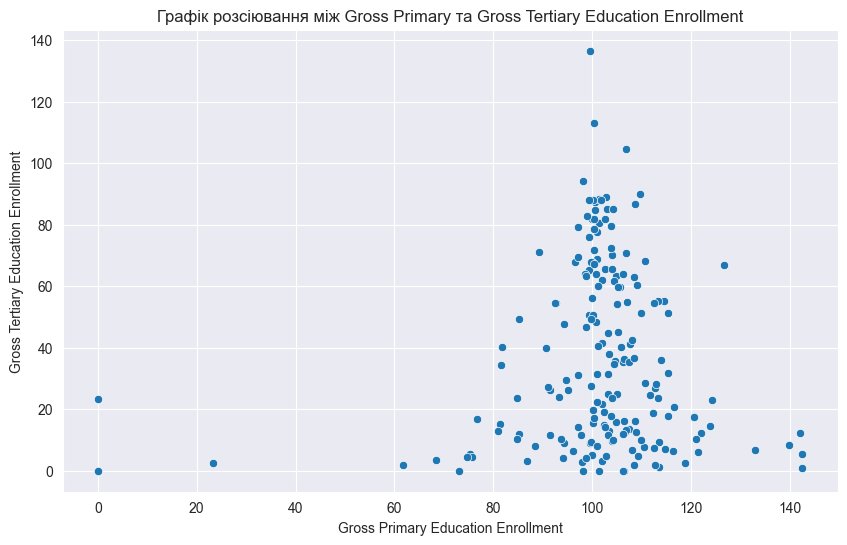

In [39]:
# 1. Графік розсіювання між 'Gross_Primary_Education_Enrollment' та 'Gross_Tertiary_Education_Enrollment'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross_Primary_Education_Enrollment', y='Gross_Tertiary_Education_Enrollment', data=education_data)
plt.title('Графік розсіювання між Gross Primary та Gross Tertiary Education Enrollment')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Gross Tertiary Education Enrollment')
plt.show()

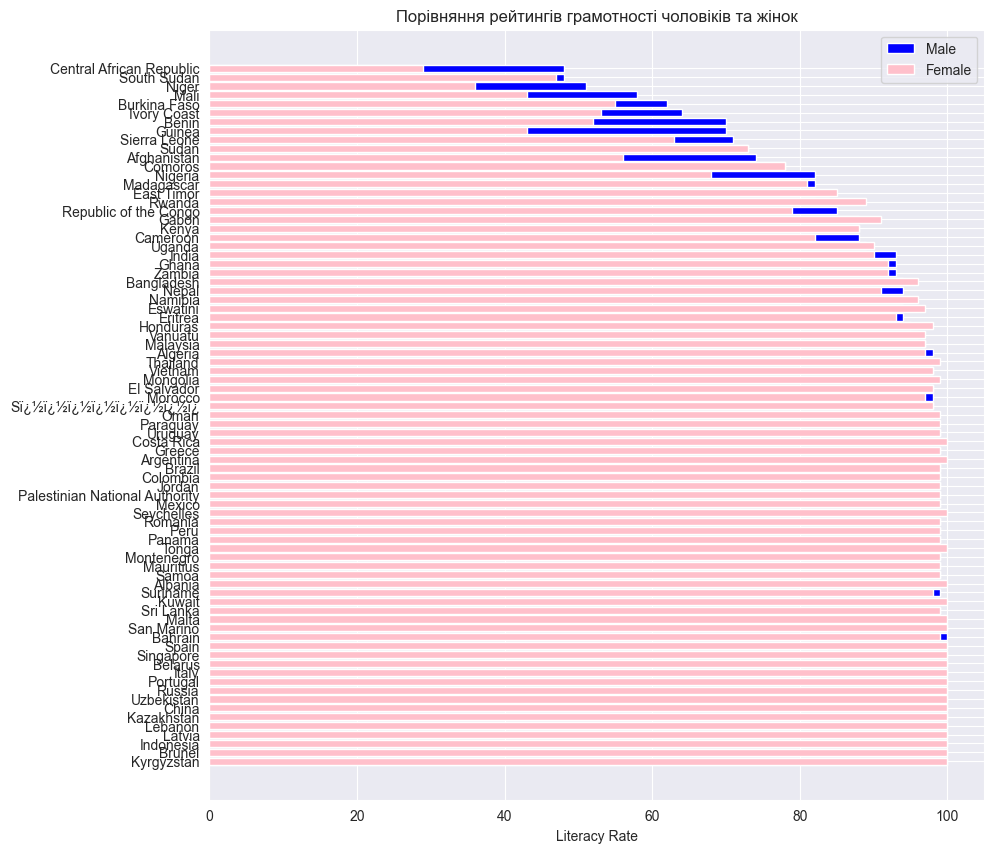

In [52]:
# Вибірка стовпців
literacy_data = education_data[['Countries and areas', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']]

# Відбір країн, де грамотність присутня для чоловіків або жінок
filtered_data = literacy_data[(literacy_data['Youth_15_24_Literacy_Rate_Male'] > 0) | (literacy_data['Youth_15_24_Literacy_Rate_Female'] > 0)]

# Сортування за рейтингом грамотності чоловіків
literacy_data_sorted = filtered_data.sort_values(by='Youth_15_24_Literacy_Rate_Male', ascending=False)

# Побудова горизонтальної стовпчастої діаграми
plt.figure(figsize=(10, 10))
plt.barh(literacy_data_sorted['Countries and areas'], literacy_data_sorted['Youth_15_24_Literacy_Rate_Male'], label='Male', color='blue')
plt.barh(literacy_data_sorted['Countries and areas'], literacy_data_sorted['Youth_15_24_Literacy_Rate_Female'], label='Female', color='pink')
plt.xlabel('Literacy Rate')
plt.title('Порівняння рейтингів грамотності чоловіків та жінок')
plt.legend()
plt.show()

5.Маніпуляції з даними: 
Створити новий стовпець 'Total_Literacy_Rate', який буде представляти загальний рейтинг грамотності для кожної країни. 
Визначити країну з найвищим загальним рейтингом грамотності. 
 

In [60]:
# 1. Створення нового стовпця 'Total_Literacy_Rate'
education_data['Total_Literacy_Rate'] = education_data['Youth_15_24_Literacy_Rate_Male'] + education_data['Youth_15_24_Literacy_Rate_Female']

# 2. Визначення країни з найвищим загальним рейтингом грамотності
country_with_highest_literacy = education_data.loc[education_data['Total_Literacy_Rate'].idxmax()]['Countries and areas']
highest_literacy_rate = education_data['Total_Literacy_Rate'].max()

print("Країна з найвищим загальним рейтингом грамотності:", country_with_highest_literacy)

Країна з найвищим загальним рейтингом грамотності: Belarus
